In [2]:
import pandas as pd


# Define the file path where you want to save the CSV file
file_path = "call_data.csv"

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)  # Set index=False to exclude the index column from the CSV file

print("DataFrame saved to:", file_path)


DataFrame saved to: call_data.csv


In [3]:
df=pd.read_csv("call_data.csv")
df.head()

,CallerID,CallerNumber,ReceiverID,ReceiverNumber,CallDate,TimeOfDay,CallDuration,GroupID,CallerLocation,CallPurpose,CallOutcome,DayOfWeek
0,John Doe,919876543210,College310,641782,2023-11-30,Morning,92,641782,Library,Business,Voicemail,Thursday
1,John Doe,919876543210,Friends9,986547,2023-07-18,Morning,471,986547,Home,Meeting,Missed,Tuesday
2,John Doe,919876543210,GymBuddies1,628731,2023-12-04,Mid Afternoon,373,628731,Gym,Meeting,Missed,Monday
3,John Doe,919876543210,GymBuddies4,628731,2023-06-09,Night,298,628731,Gym,Business,Missed,Friday
4,John Doe,919876543210,Clients7,837462,2023-12-17,Early Morning,334,837462,Office,Business,Connected,Sunday


In [5]:
# Remove unnecessary columns for modeling
df_preprocessed = df.drop(['CallerID', 'CallerNumber', 'GroupID','CallOutcome'], axis=1)

# Display the preprocessed DataFrame
df_preprocessed.head()


,ReceiverID,ReceiverNumber,CallDate,TimeOfDay,CallDuration,CallerLocation,CallPurpose,DayOfWeek
0,College310,641782,2023-11-30,Morning,92,Library,Business,Thursday
1,Friends9,986547,2023-07-18,Morning,471,Home,Meeting,Tuesday
2,GymBuddies1,628731,2023-12-04,Mid Afternoon,373,Gym,Meeting,Monday
3,GymBuddies4,628731,2023-06-09,Night,298,Gym,Business,Friday
4,Clients7,837462,2023-12-17,Early Morning,334,Office,Business,Sunday


In [7]:
import pandas as pd

# Convert 'CallDate' column to datetime format
df_preprocessed['CallDate'] = pd.to_datetime(df_preprocessed['CallDate'])

# Now you can extract the month names
df_preprocessed['Month'] = df_preprocessed['CallDate'].dt.month_name()

# Display the DataFrame to verify
print(df_preprocessed.head())


    ReceiverID  ReceiverNumber   CallDate      TimeOfDay  CallDuration  \
0   College310          641782 2023-11-30        Morning            92   
1     Friends9          986547 2023-07-18        Morning           471   
2  GymBuddies1          628731 2023-12-04  Mid Afternoon           373   
3  GymBuddies4          628731 2023-06-09          Night           298   
4     Clients7          837462 2023-12-17  Early Morning           334   

  CallerLocation CallPurpose DayOfWeek     Month  
0        Library    Business  Thursday  November  
1           Home     Meeting   Tuesday      July  
2            Gym     Meeting    Monday  December  
3            Gym    Business    Friday      June  
4         Office    Business    Sunday  December  


In [8]:
df_preprocessed.head()

,ReceiverID,ReceiverNumber,CallDate,TimeOfDay,CallDuration,CallerLocation,CallPurpose,DayOfWeek,Month
0,College310,641782,2023-11-30,Morning,92,Library,Business,Thursday,November
1,Friends9,986547,2023-07-18,Morning,471,Home,Meeting,Tuesday,July
2,GymBuddies1,628731,2023-12-04,Mid Afternoon,373,Gym,Meeting,Monday,December
3,GymBuddies4,628731,2023-06-09,Night,298,Gym,Business,Friday,June
4,Clients7,837462,2023-12-17,Early Morning,334,Office,Business,Sunday,December


In [9]:
df_preprocessed = pd.get_dummies(df_preprocessed, columns=['TimeOfDay', 'DayOfWeek', 'Month'])


In [10]:
df_preprocessed

,ReceiverID,ReceiverNumber,CallDate,CallDuration,CallerLocation,CallPurpose,TimeOfDay_Afternoon,TimeOfDay_Early Morning,TimeOfDay_Mid Afternoon,TimeOfDay_Morning,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,College310,641782,2023-11-30,92,Library,Business,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,Friends9,986547,2023-07-18,471,Home,Meeting,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,GymBuddies1,628731,2023-12-04,373,Gym,Meeting,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,GymBuddies4,628731,2023-06-09,298,Gym,Business,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Clients7,837462,2023-12-17,334,Office,Business,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Colleagues5,471825,2023-05-25,448,Office,Business,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
996,Colleagues10,471825,2023-12-25,306,Office,Business,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
997,Dentist4,465823,2023-01-21,209,Hospital,Meeting,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
998,College22,891354,2023-11-27,220,Library,Business,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [11]:
df_preprocessed.shape

(1000, 30)

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'ReceiverID' column
df_preprocessed['ReceiverID'] = label_encoder.fit_transform(df['ReceiverID'])


In [13]:
df_preprocessed.head()

,ReceiverID,ReceiverNumber,CallDate,CallDuration,CallerLocation,CallPurpose,TimeOfDay_Afternoon,TimeOfDay_Early Morning,TimeOfDay_Mid Afternoon,TimeOfDay_Morning,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,41,641782,2023-11-30,92,Library,Business,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,99,986547,2023-07-18,471,Home,Meeting,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,100,628731,2023-12-04,373,Gym,Meeting,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,104,628731,2023-06-09,298,Gym,Business,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,7,837462,2023-12-17,334,Office,Business,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [14]:
# Convert 'ReceiverID' and 'ReceiverNumber' columns to strings and then concatenate
df_preprocessed['EncodedReceiverID'] = df_preprocessed['ReceiverID'].astype(str) + '-' + df_preprocessed['ReceiverNumber'].astype(str)

# Display the DataFrame to verify
print(df_preprocessed.head())


   ReceiverID  ReceiverNumber   CallDate  CallDuration CallerLocation  \
0          41          641782 2023-11-30            92        Library   
1          99          986547 2023-07-18           471           Home   
2         100          628731 2023-12-04           373            Gym   
3         104          628731 2023-06-09           298            Gym   
4           7          837462 2023-12-17           334         Office   

  CallPurpose  TimeOfDay_Afternoon  TimeOfDay_Early Morning  \
0    Business                    0                        0   
1     Meeting                    0                        0   
2     Meeting                    0                        0   
3    Business                    0                        0   
4    Business                    0                        1   

   TimeOfDay_Mid Afternoon  TimeOfDay_Morning  ...  Month_February  \
0                        0                  1  ...               0   
1                        0                

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the concatenated column
df_preprocessed['EncodedReceiverID'] = label_encoder.fit_transform(df_preprocessed['EncodedReceiverID'])

# Display the DataFrame to verify
print(df_preprocessed.head())


   ReceiverID  ReceiverNumber   CallDate  CallDuration CallerLocation  \
0          41          641782 2023-11-30            92        Library   
1          99          986547 2023-07-18           471           Home   
2         100          628731 2023-12-04           373            Gym   
3         104          628731 2023-06-09           298            Gym   
4           7          837462 2023-12-17           334         Office   

  CallPurpose  TimeOfDay_Afternoon  TimeOfDay_Early Morning  \
0    Business                    0                        0   
1     Meeting                    0                        0   
2     Meeting                    0                        0   
3    Business                    0                        0   
4    Business                    0                        1   

   TimeOfDay_Mid Afternoon  TimeOfDay_Morning  ...  Month_February  \
0                        0                  1  ...               0   
1                        0                

In [16]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ReceiverID               1000 non-null   int64         
 1   ReceiverNumber           1000 non-null   int64         
 2   CallDate                 1000 non-null   datetime64[ns]
 3   CallDuration             1000 non-null   int64         
 4   CallerLocation           1000 non-null   object        
 5   CallPurpose              1000 non-null   object        
 6   TimeOfDay_Afternoon      1000 non-null   uint8         
 7   TimeOfDay_Early Morning  1000 non-null   uint8         
 8   TimeOfDay_Mid Afternoon  1000 non-null   uint8         
 9   TimeOfDay_Morning        1000 non-null   uint8         
 10  TimeOfDay_Night          1000 non-null   uint8         
 11  DayOfWeek_Friday         1000 non-null   uint8         
 12  DayOfWeek_Monday         1000 non-n

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to 'CallerLocation' and 'CallPurpose' columns
df_preprocessed['EncodedCallerLocation'] = label_encoder.fit_transform(df_preprocessed['CallerLocation'])
df_preprocessed['EncodedCallPurpose'] = label_encoder.fit_transform(df_preprocessed['CallPurpose'])

# Display the DataFrame to verify
df_preprocessed.head()


,ReceiverID,ReceiverNumber,CallDate,CallDuration,CallerLocation,CallPurpose,TimeOfDay_Afternoon,TimeOfDay_Early Morning,TimeOfDay_Mid Afternoon,TimeOfDay_Morning,...,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,EncodedReceiverID,EncodedCallerLocation,EncodedCallPurpose
0,41,641782,2023-11-30,92,Library,Business,0,0,0,1,...,0,0,0,0,1,0,0,66,4,0
1,99,986547,2023-07-18,471,Home,Meeting,0,0,0,1,...,1,0,0,0,0,0,0,129,2,1
2,100,628731,2023-12-04,373,Gym,Meeting,0,0,1,0,...,0,0,0,0,0,0,0,3,1,1
3,104,628731,2023-06-09,298,Gym,Business,0,0,0,0,...,0,1,0,0,0,0,0,7,1,0
4,7,837462,2023-12-17,334,Office,Business,0,1,0,0,...,0,0,0,0,0,0,0,97,5,0


In [18]:
# Drop the unnecessary columns after label encoding
df_preprocessed.drop(['ReceiverID', 'ReceiverNumber', 'CallDate','CallDuration','CallerLocation','CallPurpose' ], axis=1, inplace=True)




In [19]:
df_preprocessed.head()

,TimeOfDay_Afternoon,TimeOfDay_Early Morning,TimeOfDay_Mid Afternoon,TimeOfDay_Morning,TimeOfDay_Night,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,...,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,EncodedReceiverID,EncodedCallerLocation,EncodedCallPurpose
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,66,4,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,129,2,1
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3,1,1
3,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,7,1,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,97,5,0


In [20]:
from sklearn.model_selection import train_test_split

# Split the preprocessed data into features (X) and target variable (y)
X = df_preprocessed.drop('EncodedReceiverID', axis=1)
y = df_preprocessed['EncodedReceiverID']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using the model
rf_predictions = rf_model.predict(X_test)

# Calculate Mean Absolute Error
rf_mae = mean_absolute_error(y_test, rf_predictions)
print("Random Forest Mean Absolute Error:", rf_mae)


Random Forest Mean Absolute Error: 20.85180206349206


In [22]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Create a CatBoostRegressor instance
catboost_regressor = CatBoostRegressor(iterations=1000,  # Number of trees
                                       learning_rate=0.1,  # Learning rate
                                       depth=6)  # Depth of trees

# Define the number of folds for cross-validation
num_folds = 5

# Define a scorer for the cross-validation
scorer = make_scorer(mean_absolute_error)

# Perform k-fold cross-validation for the CatBoost model
catboost_scores = cross_val_score(catboost_regressor, X_train, y_train, cv=num_folds, scoring=scorer)

# Calculate the mean MAE for the CatBoost model
mean_catboost_mae = catboost_scores.mean()

print("Mean MAE for CatBoost model:", mean_catboost_mae)


0:	learn: 38.0830971	total: 57ms	remaining: 56.9s
1:	learn: 37.1638487	total: 57.4ms	remaining: 28.7s
2:	learn: 36.4701178	total: 57.6ms	remaining: 19.2s
3:	learn: 35.6166307	total: 57.9ms	remaining: 14.4s
4:	learn: 34.8205236	total: 58.1ms	remaining: 11.6s
5:	learn: 34.4206555	total: 58.3ms	remaining: 9.66s
6:	learn: 33.7862691	total: 58.6ms	remaining: 8.31s
7:	learn: 33.2562146	total: 58.8ms	remaining: 7.29s
8:	learn: 33.0128579	total: 59ms	remaining: 6.5s
9:	learn: 32.7556615	total: 59.2ms	remaining: 5.86s
10:	learn: 32.3870189	total: 59.5ms	remaining: 5.35s
11:	learn: 31.9633645	total: 59.8ms	remaining: 4.92s
12:	learn: 31.7075609	total: 60ms	remaining: 4.56s
13:	learn: 31.4890068	total: 60.3ms	remaining: 4.25s
14:	learn: 31.3382609	total: 60.5ms	remaining: 3.97s
15:	learn: 30.9997161	total: 60.7ms	remaining: 3.73s
16:	learn: 30.7700686	total: 60.9ms	remaining: 3.52s
17:	learn: 30.5126590	total: 61.1ms	remaining: 3.33s
18:	learn: 30.3670535	total: 61.3ms	remaining: 3.17s
19:	learn:

286:	learn: 14.8711994	total: 122ms	remaining: 304ms
287:	learn: 14.8428544	total: 123ms	remaining: 303ms
288:	learn: 14.8177259	total: 123ms	remaining: 303ms
289:	learn: 14.7813952	total: 123ms	remaining: 302ms
290:	learn: 14.7596884	total: 124ms	remaining: 301ms
291:	learn: 14.7248758	total: 124ms	remaining: 300ms
292:	learn: 14.7008857	total: 124ms	remaining: 299ms
293:	learn: 14.6830724	total: 124ms	remaining: 298ms
294:	learn: 14.6639828	total: 124ms	remaining: 297ms
295:	learn: 14.6366260	total: 125ms	remaining: 297ms
296:	learn: 14.6157977	total: 125ms	remaining: 296ms
297:	learn: 14.5878568	total: 125ms	remaining: 295ms
298:	learn: 14.5523448	total: 125ms	remaining: 294ms
299:	learn: 14.5241308	total: 125ms	remaining: 293ms
300:	learn: 14.4910013	total: 126ms	remaining: 292ms
301:	learn: 14.4647810	total: 126ms	remaining: 291ms
302:	learn: 14.4472451	total: 126ms	remaining: 290ms
303:	learn: 14.4204508	total: 126ms	remaining: 289ms
304:	learn: 14.4012957	total: 127ms	remaining:

789:	learn: 7.9542762	total: 240ms	remaining: 63.9ms
790:	learn: 7.9477292	total: 241ms	remaining: 63.6ms
791:	learn: 7.9445431	total: 241ms	remaining: 63.3ms
792:	learn: 7.9407350	total: 241ms	remaining: 63ms
793:	learn: 7.9342389	total: 242ms	remaining: 62.7ms
794:	learn: 7.9278913	total: 242ms	remaining: 62.4ms
795:	learn: 7.9247706	total: 242ms	remaining: 62ms
796:	learn: 7.9105878	total: 242ms	remaining: 61.7ms
797:	learn: 7.9042410	total: 243ms	remaining: 61.4ms
798:	learn: 7.8986285	total: 243ms	remaining: 61.1ms
799:	learn: 7.8945504	total: 244ms	remaining: 61ms
800:	learn: 7.8885386	total: 244ms	remaining: 60.6ms
801:	learn: 7.8807430	total: 244ms	remaining: 60.3ms
802:	learn: 7.8742525	total: 245ms	remaining: 60ms
803:	learn: 7.8652814	total: 245ms	remaining: 59.7ms
804:	learn: 7.8588726	total: 245ms	remaining: 59.4ms
805:	learn: 7.8522110	total: 245ms	remaining: 59.1ms
806:	learn: 7.8477339	total: 246ms	remaining: 58.7ms
807:	learn: 7.8413990	total: 246ms	remaining: 58.4ms
8

0:	learn: 37.7287021	total: 379us	remaining: 379ms
1:	learn: 36.8968189	total: 837us	remaining: 418ms
2:	learn: 36.2410157	total: 1.1ms	remaining: 367ms
3:	learn: 35.5709141	total: 1.33ms	remaining: 332ms
4:	learn: 34.7733717	total: 1.66ms	remaining: 330ms
5:	learn: 34.2122704	total: 1.87ms	remaining: 310ms
6:	learn: 33.6150411	total: 2.08ms	remaining: 295ms
7:	learn: 33.2933591	total: 2.39ms	remaining: 296ms
8:	learn: 33.0071239	total: 2.63ms	remaining: 289ms
9:	learn: 32.4975816	total: 2.9ms	remaining: 287ms
10:	learn: 32.1036979	total: 3.13ms	remaining: 281ms
11:	learn: 31.7310317	total: 3.37ms	remaining: 278ms
12:	learn: 31.4476638	total: 3.84ms	remaining: 291ms
13:	learn: 31.1490044	total: 4.17ms	remaining: 294ms
14:	learn: 30.8470886	total: 4.43ms	remaining: 291ms
15:	learn: 30.6061546	total: 4.64ms	remaining: 285ms
16:	learn: 30.3733249	total: 4.89ms	remaining: 283ms
17:	learn: 30.1803688	total: 5.17ms	remaining: 282ms
18:	learn: 29.9682906	total: 5.41ms	remaining: 280ms
19:	lea

487:	learn: 10.0934687	total: 116ms	remaining: 122ms
488:	learn: 10.0759766	total: 117ms	remaining: 122ms
489:	learn: 10.0601035	total: 117ms	remaining: 122ms
490:	learn: 10.0472218	total: 117ms	remaining: 121ms
491:	learn: 10.0301515	total: 117ms	remaining: 121ms
492:	learn: 10.0172619	total: 118ms	remaining: 121ms
493:	learn: 10.0048347	total: 118ms	remaining: 121ms
494:	learn: 9.9924725	total: 118ms	remaining: 120ms
495:	learn: 9.9728990	total: 118ms	remaining: 120ms
496:	learn: 9.9567891	total: 119ms	remaining: 120ms
497:	learn: 9.9398123	total: 119ms	remaining: 120ms
498:	learn: 9.9233088	total: 119ms	remaining: 120ms
499:	learn: 9.9072027	total: 119ms	remaining: 119ms
500:	learn: 9.8913197	total: 120ms	remaining: 119ms
501:	learn: 9.8789076	total: 120ms	remaining: 119ms
502:	learn: 9.8694480	total: 120ms	remaining: 119ms
503:	learn: 9.8596631	total: 120ms	remaining: 119ms
504:	learn: 9.8459374	total: 121ms	remaining: 118ms
505:	learn: 9.8359698	total: 121ms	remaining: 118ms
506:	

737:	learn: 7.4698971	total: 184ms	remaining: 65.3ms
738:	learn: 7.4614886	total: 184ms	remaining: 65.1ms
739:	learn: 7.4541320	total: 184ms	remaining: 64.8ms
740:	learn: 7.4458735	total: 185ms	remaining: 64.6ms
741:	learn: 7.4392070	total: 185ms	remaining: 64.4ms
742:	learn: 7.4338540	total: 185ms	remaining: 64.1ms
743:	learn: 7.4256705	total: 186ms	remaining: 63.9ms
744:	learn: 7.4176298	total: 186ms	remaining: 63.6ms
745:	learn: 7.4129829	total: 186ms	remaining: 63.4ms
746:	learn: 7.4017789	total: 187ms	remaining: 63.2ms
747:	learn: 7.3941559	total: 187ms	remaining: 63ms
748:	learn: 7.3873040	total: 187ms	remaining: 62.7ms
749:	learn: 7.3787813	total: 187ms	remaining: 62.5ms
750:	learn: 7.3720142	total: 188ms	remaining: 62.2ms
751:	learn: 7.3632750	total: 188ms	remaining: 62ms
752:	learn: 7.3561073	total: 188ms	remaining: 61.7ms
753:	learn: 7.3485307	total: 189ms	remaining: 61.5ms
754:	learn: 7.3415989	total: 189ms	remaining: 61.3ms
755:	learn: 7.3327401	total: 189ms	remaining: 61ms

123:	learn: 22.2662995	total: 33.4ms	remaining: 236ms
124:	learn: 22.2242543	total: 34ms	remaining: 238ms
125:	learn: 22.1562900	total: 34.2ms	remaining: 237ms
126:	learn: 22.1054087	total: 34.5ms	remaining: 237ms
127:	learn: 22.0650318	total: 34.8ms	remaining: 237ms
128:	learn: 22.0102022	total: 35ms	remaining: 236ms
129:	learn: 21.9526763	total: 35.2ms	remaining: 236ms
130:	learn: 21.9011139	total: 35.4ms	remaining: 235ms
131:	learn: 21.8648742	total: 35.7ms	remaining: 235ms
132:	learn: 21.8178707	total: 35.9ms	remaining: 234ms
133:	learn: 21.7687930	total: 36.1ms	remaining: 233ms
134:	learn: 21.7155242	total: 36.4ms	remaining: 233ms
135:	learn: 21.6580318	total: 36.6ms	remaining: 233ms
136:	learn: 21.6046067	total: 36.8ms	remaining: 232ms
137:	learn: 21.5359679	total: 37.1ms	remaining: 232ms
138:	learn: 21.4986920	total: 37.4ms	remaining: 231ms
139:	learn: 21.4548673	total: 37.6ms	remaining: 231ms
140:	learn: 21.3821011	total: 37.9ms	remaining: 231ms
141:	learn: 21.3378979	total: 38

366:	learn: 14.1344163	total: 101ms	remaining: 175ms
367:	learn: 14.1119711	total: 102ms	remaining: 175ms
368:	learn: 14.0817055	total: 102ms	remaining: 174ms
369:	learn: 14.0588458	total: 102ms	remaining: 174ms
370:	learn: 14.0405771	total: 103ms	remaining: 174ms
371:	learn: 14.0159245	total: 103ms	remaining: 174ms
372:	learn: 13.9871258	total: 103ms	remaining: 173ms
373:	learn: 13.9626893	total: 103ms	remaining: 173ms
374:	learn: 13.9468415	total: 104ms	remaining: 173ms
375:	learn: 13.9195666	total: 104ms	remaining: 172ms
376:	learn: 13.8951995	total: 104ms	remaining: 172ms
377:	learn: 13.8707925	total: 104ms	remaining: 172ms
378:	learn: 13.8471820	total: 105ms	remaining: 172ms
379:	learn: 13.8245333	total: 105ms	remaining: 171ms
380:	learn: 13.8115112	total: 105ms	remaining: 171ms
381:	learn: 13.7897221	total: 105ms	remaining: 171ms
382:	learn: 13.7707024	total: 106ms	remaining: 170ms
383:	learn: 13.7429542	total: 106ms	remaining: 170ms
384:	learn: 13.7284755	total: 106ms	remaining:

796:	learn: 8.6528220	total: 217ms	remaining: 55.2ms
797:	learn: 8.6467782	total: 217ms	remaining: 55ms
798:	learn: 8.6404644	total: 217ms	remaining: 54.7ms
799:	learn: 8.6358909	total: 218ms	remaining: 54.4ms
800:	learn: 8.6277975	total: 218ms	remaining: 54.1ms
801:	learn: 8.6217629	total: 218ms	remaining: 53.9ms
802:	learn: 8.6157263	total: 219ms	remaining: 53.8ms
803:	learn: 8.6071807	total: 219ms	remaining: 53.5ms
804:	learn: 8.6032107	total: 220ms	remaining: 53.2ms
805:	learn: 8.5981646	total: 220ms	remaining: 52.9ms
806:	learn: 8.5925904	total: 220ms	remaining: 52.6ms
807:	learn: 8.5831234	total: 220ms	remaining: 52.4ms
808:	learn: 8.5761618	total: 221ms	remaining: 52.1ms
809:	learn: 8.5692672	total: 221ms	remaining: 51.8ms
810:	learn: 8.5638598	total: 221ms	remaining: 51.5ms
811:	learn: 8.5581435	total: 221ms	remaining: 51.2ms
812:	learn: 8.5517066	total: 222ms	remaining: 51ms
813:	learn: 8.5434926	total: 222ms	remaining: 50.7ms
814:	learn: 8.5368281	total: 222ms	remaining: 50.4

0:	learn: 38.4039824	total: 389us	remaining: 389ms
1:	learn: 37.5006777	total: 724us	remaining: 362ms
2:	learn: 36.8063998	total: 948us	remaining: 315ms
3:	learn: 36.0080291	total: 1.2ms	remaining: 300ms
4:	learn: 35.2206663	total: 1.54ms	remaining: 307ms
5:	learn: 34.6743763	total: 1.92ms	remaining: 318ms
6:	learn: 34.0888459	total: 2.18ms	remaining: 309ms
7:	learn: 33.5713379	total: 2.45ms	remaining: 303ms
8:	learn: 33.2209839	total: 2.72ms	remaining: 299ms
9:	learn: 33.0067957	total: 2.91ms	remaining: 288ms
10:	learn: 32.6257114	total: 3.19ms	remaining: 286ms
11:	learn: 32.2558004	total: 3.42ms	remaining: 281ms
12:	learn: 32.0532349	total: 3.71ms	remaining: 282ms
13:	learn: 31.9088691	total: 3.95ms	remaining: 278ms
14:	learn: 31.6576385	total: 4.26ms	remaining: 280ms
15:	learn: 31.3326536	total: 4.57ms	remaining: 281ms
16:	learn: 31.1552884	total: 4.8ms	remaining: 278ms
17:	learn: 30.9736594	total: 5.02ms	remaining: 274ms
18:	learn: 30.7695510	total: 5.28ms	remaining: 272ms
19:	lear

345:	learn: 13.6090528	total: 113ms	remaining: 213ms
346:	learn: 13.5843648	total: 113ms	remaining: 213ms
347:	learn: 13.5454222	total: 113ms	remaining: 212ms
348:	learn: 13.5334557	total: 114ms	remaining: 212ms
349:	learn: 13.5168800	total: 114ms	remaining: 212ms
350:	learn: 13.4972736	total: 114ms	remaining: 211ms
351:	learn: 13.4766183	total: 115ms	remaining: 211ms
352:	learn: 13.4497399	total: 115ms	remaining: 211ms
353:	learn: 13.4303860	total: 115ms	remaining: 210ms
354:	learn: 13.4079346	total: 115ms	remaining: 210ms
355:	learn: 13.3896653	total: 116ms	remaining: 209ms
356:	learn: 13.3654867	total: 116ms	remaining: 209ms
357:	learn: 13.3430915	total: 116ms	remaining: 209ms
358:	learn: 13.3288214	total: 117ms	remaining: 208ms
359:	learn: 13.3073147	total: 117ms	remaining: 208ms
360:	learn: 13.2802900	total: 117ms	remaining: 208ms
361:	learn: 13.2444605	total: 118ms	remaining: 207ms
362:	learn: 13.2184979	total: 118ms	remaining: 207ms
363:	learn: 13.1963171	total: 118ms	remaining:

535:	learn: 10.2250682	total: 182ms	remaining: 158ms
536:	learn: 10.2054474	total: 183ms	remaining: 158ms
537:	learn: 10.1858998	total: 183ms	remaining: 157ms
538:	learn: 10.1708860	total: 184ms	remaining: 157ms
539:	learn: 10.1629464	total: 184ms	remaining: 157ms
540:	learn: 10.1478461	total: 184ms	remaining: 157ms
541:	learn: 10.1361302	total: 185ms	remaining: 156ms
542:	learn: 10.1243480	total: 186ms	remaining: 156ms
543:	learn: 10.1190370	total: 186ms	remaining: 156ms
544:	learn: 10.1044517	total: 186ms	remaining: 156ms
545:	learn: 10.0847403	total: 187ms	remaining: 155ms
546:	learn: 10.0690243	total: 187ms	remaining: 155ms
547:	learn: 10.0535580	total: 188ms	remaining: 155ms
548:	learn: 10.0397287	total: 188ms	remaining: 155ms
549:	learn: 10.0286391	total: 189ms	remaining: 154ms
550:	learn: 10.0144457	total: 189ms	remaining: 154ms
551:	learn: 10.0049912	total: 189ms	remaining: 154ms
552:	learn: 9.9941389	total: 190ms	remaining: 154ms
553:	learn: 9.9837584	total: 190ms	remaining: 1

823:	learn: 7.4818219	total: 294ms	remaining: 62.8ms
824:	learn: 7.4756866	total: 294ms	remaining: 62.4ms
825:	learn: 7.4665842	total: 295ms	remaining: 62.1ms
826:	learn: 7.4573450	total: 295ms	remaining: 61.7ms
827:	learn: 7.4496915	total: 296ms	remaining: 61.4ms
828:	learn: 7.4454478	total: 296ms	remaining: 61ms
829:	learn: 7.4410448	total: 296ms	remaining: 60.7ms
830:	learn: 7.4327994	total: 297ms	remaining: 60.3ms
831:	learn: 7.4274085	total: 297ms	remaining: 60ms
832:	learn: 7.4212548	total: 297ms	remaining: 59.6ms
833:	learn: 7.4164103	total: 298ms	remaining: 59.3ms
834:	learn: 7.4097675	total: 298ms	remaining: 58.9ms
835:	learn: 7.4054223	total: 298ms	remaining: 58.6ms
836:	learn: 7.3990542	total: 299ms	remaining: 58.2ms
837:	learn: 7.3947758	total: 299ms	remaining: 57.9ms
838:	learn: 7.3877419	total: 300ms	remaining: 57.5ms
839:	learn: 7.3802962	total: 300ms	remaining: 57.2ms
840:	learn: 7.3750341	total: 300ms	remaining: 56.8ms
841:	learn: 7.3709459	total: 301ms	remaining: 56.4

0:	learn: 37.9246886	total: 524us	remaining: 523ms
1:	learn: 37.0567259	total: 1.1ms	remaining: 547ms
2:	learn: 36.3638892	total: 1.57ms	remaining: 521ms
3:	learn: 35.7344821	total: 1.99ms	remaining: 497ms
4:	learn: 35.2555334	total: 2.39ms	remaining: 476ms
5:	learn: 34.6935914	total: 2.78ms	remaining: 461ms
6:	learn: 34.0206186	total: 3.15ms	remaining: 446ms
7:	learn: 33.5862362	total: 3.66ms	remaining: 454ms
8:	learn: 33.1039604	total: 4.13ms	remaining: 455ms
9:	learn: 32.8334019	total: 4.39ms	remaining: 435ms
10:	learn: 32.4987552	total: 4.75ms	remaining: 427ms
11:	learn: 32.3506151	total: 5.13ms	remaining: 422ms
12:	learn: 31.9662535	total: 5.5ms	remaining: 418ms
13:	learn: 31.7527591	total: 5.9ms	remaining: 416ms
14:	learn: 31.5309291	total: 6.3ms	remaining: 414ms
15:	learn: 31.1682127	total: 6.71ms	remaining: 413ms
16:	learn: 30.9616476	total: 7.14ms	remaining: 413ms
17:	learn: 30.7610009	total: 7.58ms	remaining: 414ms
18:	learn: 30.5899095	total: 8.07ms	remaining: 417ms
19:	lear

253:	learn: 15.7506540	total: 95.2ms	remaining: 280ms
254:	learn: 15.7170793	total: 95.6ms	remaining: 279ms
255:	learn: 15.6766062	total: 95.9ms	remaining: 279ms
256:	learn: 15.6455628	total: 96.2ms	remaining: 278ms
257:	learn: 15.6059789	total: 96.6ms	remaining: 278ms
258:	learn: 15.5813053	total: 96.8ms	remaining: 277ms
259:	learn: 15.5502991	total: 97.2ms	remaining: 277ms
260:	learn: 15.5274825	total: 97.6ms	remaining: 276ms
261:	learn: 15.4956802	total: 98ms	remaining: 276ms
262:	learn: 15.4749702	total: 98.3ms	remaining: 275ms
263:	learn: 15.4476528	total: 98.5ms	remaining: 275ms
264:	learn: 15.4172972	total: 98.8ms	remaining: 274ms
265:	learn: 15.3782632	total: 99.2ms	remaining: 274ms
266:	learn: 15.3336185	total: 99.5ms	remaining: 273ms
267:	learn: 15.2987107	total: 99.9ms	remaining: 273ms
268:	learn: 15.2770836	total: 100ms	remaining: 272ms
269:	learn: 15.2592569	total: 100ms	remaining: 272ms
270:	learn: 15.2420955	total: 101ms	remaining: 271ms
271:	learn: 15.1908920	total: 101

519:	learn: 10.4477528	total: 182ms	remaining: 168ms
520:	learn: 10.4407694	total: 183ms	remaining: 168ms
521:	learn: 10.4300569	total: 184ms	remaining: 168ms
522:	learn: 10.4138633	total: 184ms	remaining: 168ms
523:	learn: 10.4035879	total: 184ms	remaining: 168ms
524:	learn: 10.3948059	total: 185ms	remaining: 167ms
525:	learn: 10.3864819	total: 185ms	remaining: 167ms
526:	learn: 10.3768723	total: 185ms	remaining: 166ms
527:	learn: 10.3646812	total: 186ms	remaining: 166ms
528:	learn: 10.3514276	total: 186ms	remaining: 166ms
529:	learn: 10.3422074	total: 187ms	remaining: 165ms
530:	learn: 10.3328295	total: 187ms	remaining: 165ms
531:	learn: 10.3160066	total: 187ms	remaining: 165ms
532:	learn: 10.3066097	total: 188ms	remaining: 164ms
533:	learn: 10.2964823	total: 188ms	remaining: 164ms
534:	learn: 10.2888305	total: 189ms	remaining: 164ms
535:	learn: 10.2742434	total: 189ms	remaining: 164ms
536:	learn: 10.2620728	total: 189ms	remaining: 163ms
537:	learn: 10.2536184	total: 190ms	remaining:

765:	learn: 8.2869577	total: 275ms	remaining: 83.9ms
766:	learn: 8.2815493	total: 275ms	remaining: 83.6ms
767:	learn: 8.2739548	total: 276ms	remaining: 83.2ms
768:	learn: 8.2660922	total: 276ms	remaining: 82.9ms
769:	learn: 8.2611398	total: 276ms	remaining: 82.5ms
770:	learn: 8.2572054	total: 276ms	remaining: 82.1ms
771:	learn: 8.2499287	total: 277ms	remaining: 81.7ms
772:	learn: 8.2432570	total: 277ms	remaining: 81.3ms
773:	learn: 8.2357711	total: 277ms	remaining: 81ms
774:	learn: 8.2303430	total: 278ms	remaining: 80.6ms
775:	learn: 8.2234768	total: 278ms	remaining: 80.2ms
776:	learn: 8.2163665	total: 278ms	remaining: 79.8ms
777:	learn: 8.2129430	total: 278ms	remaining: 79.4ms
778:	learn: 8.2051818	total: 279ms	remaining: 79.1ms
779:	learn: 8.2012296	total: 279ms	remaining: 78.7ms
780:	learn: 8.1975712	total: 279ms	remaining: 78.3ms
781:	learn: 8.1902929	total: 280ms	remaining: 77.9ms
782:	learn: 8.1834528	total: 280ms	remaining: 77.6ms
783:	learn: 8.1801565	total: 280ms	remaining: 77

Mean MAE for CatBoost model: 26.361744044344228


In [23]:
print("Mean MAE for CatBoost model:", mean_catboost_mae)


Mean MAE for CatBoost model: 26.361744044344228


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)

# Print the evaluation metrics
print("Random Forest Mean Absolute Error (MAE):", rf_mae)
print("Random Forest Mean Squared Error (MSE):", rf_mse)
print("Random Forest Root Mean Squared Error (RMSE):", rf_rmse)
print("Random Forest R-squared (R2) Score:", rf_r2)


Random Forest Mean Absolute Error (MAE): 20.85180206349206
Random Forest Mean Squared Error (MSE): 910.9657396701385
Random Forest Root Mean Squared Error (RMSE): 30.182208992552855
Random Forest R-squared (R2) Score: 0.4167434353348459


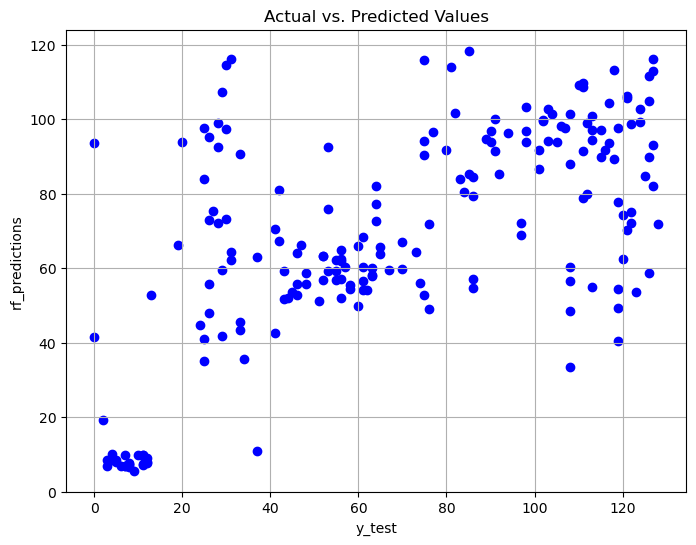

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, color='blue')
plt.title('Actual vs. Predicted Values')
plt.xlabel('y_test')
plt.ylabel('rf_predictions')
plt.grid(True)
plt.show()